In [35]:
import tensorflow as tf
from tensorflow.keras import Input, Model, layers
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Load pretrained model (imagenet)
pretrained_base = InceptionV3(
    include_top=False,
    input_shape=(128, 128, 3),
    weights='imagenet'
)
pretrained_base.trainable = False

# Build model
inputs = Input(shape=(128, 128, 3))
x = preprocess_input(inputs)
x = pretrained_base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(6, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = Model(inputs, outputs)

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

# Load data
batch_size = 32
img_size = (128, 128)

ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    './data/car_or_truck/train',
    label_mode='binary',
    image_size=img_size,
    batch_size=batch_size
)

ds_valid = tf.keras.preprocessing.image_dataset_from_directory(
    './data/car_or_truck/valid',
    label_mode='binary',
    image_size=img_size,
    batch_size=batch_size
)

AUTOTUNE = tf.data.AUTOTUNE
ds_train = ds_train.map(lambda x, y: (preprocess_input(x), y)).prefetch(AUTOTUNE)
ds_valid = ds_valid.map(lambda x, y: (preprocess_input(x), y)).prefetch(AUTOTUNE)

callback = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
# Train
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=15,
    verbose=0,
    callbacks=[callback]
)


Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


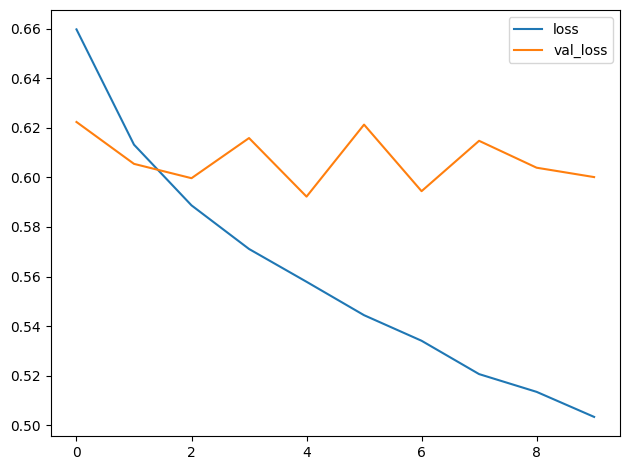

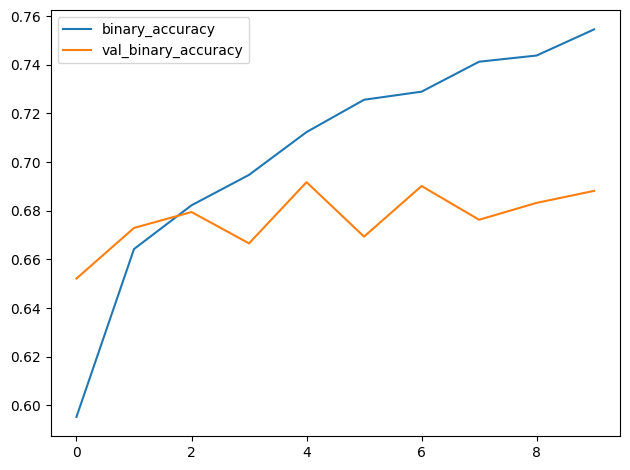

In [36]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();